In [2]:
import requests

def fetch(url, payload={}):
    print(f'Fetching {url}')
    response = requests.get(url, params=payload)
    data = response.json()
    return data


districts = []
url = 'https://michiganelections.io/api/districts/'
while url:
    output = fetch(url)
    results = output['results']
    url = output['next']
    districts.extend(results)
    
print(f'Fetched {len(districts)} districts')

Fetching https://michiganelections.io/api/districts/
Fetching http://michiganelections.io/api/districts/?limit=100&offset=100
Fetching http://michiganelections.io/api/districts/?limit=100&offset=200
Fetching http://michiganelections.io/api/districts/?limit=100&offset=300
Fetching http://michiganelections.io/api/districts/?limit=100&offset=400
Fetching http://michiganelections.io/api/districts/?limit=100&offset=500
Fetching http://michiganelections.io/api/districts/?limit=100&offset=600
Fetching http://michiganelections.io/api/districts/?limit=100&offset=700
Fetching http://michiganelections.io/api/districts/?limit=100&offset=800
Fetching http://michiganelections.io/api/districts/?limit=100&offset=900
Fetching http://michiganelections.io/api/districts/?limit=100&offset=1000
Fetching http://michiganelections.io/api/districts/?limit=100&offset=1100
Fetching http://michiganelections.io/api/districts/?limit=100&offset=1200
Fetching http://michiganelections.io/api/districts/?limit=100&offset

In [19]:
districts[0]

{'url': 'http://michiganelections.io/api/districts/4/',
 'id': 4,
 'category': 'County Commissioner District',
 'name': '15th District'}

In [47]:
from collections import defaultdict

district_count = defaultdict(int)

for district in districts:
    category = district['category']
    if category != 'Jurisdiction':
        district_count[category] += 1
    
district_count

defaultdict(int,
            {'County Commissioner District': 16,
             'Court of Appeals District': 8,
             'District Court District': 65,
             'Intermediate School District': 16,
             'Probate Court District': 71,
             'School District': 18,
             'State House District': 110,
             'State Senate District': 38,
             'US Congress District': 14,
             'County': 81,
             'Circuit Court District': 52,
             'Library District': 30,
             'State District': 1,
             'City': 3,
             'Township': 2,
             'School District District': 1,
             'Community College District': 29,
             'Probate District Court District': 6,
             'Local School District': 527,
             'Village District': 235,
             'District Library District': 4})

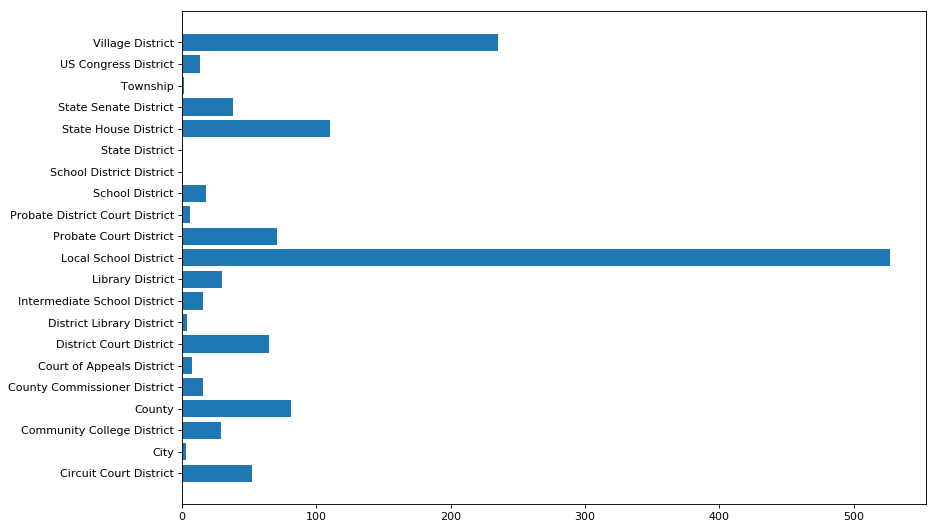

In [53]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

x, y = zip(*sorted(district_count.items()))

plt.barh(x, y)
plt.show()

In [3]:
# Am I registered to vote?
import requests
#first_name==Rosalynn last_name==Bliss birth_date==1975-08-03 zip_code==49503
voterinfo = []
url = 'https://michiganelections.io/api/registrations/'

payload = {'first_name':'Rosalynn', 'last_name':'Bliss', 'birth_date':'1975-08-03', 'zip_code':'49503'}

results = fetch(url, payload)

registered = results['registered']
precinct = results['precinct']


print(payload['first_name'], "is registered?", registered)
print("Precinct: ", precinct)

# print(f'Fetched {data}')

Fetching https://michiganelections.io/api/registrations/
Rosalynn is registered? True
Precinct:  {'url': 'http://michiganelections.io/api/precincts/1173/', 'id': 1173, 'county': 'Kent', 'jurisdiction': 'City of Grand Rapids', 'ward': '2', 'number': '30'}


In [8]:
# Get ballot information for the precinct!

payload = {'precinct_id':precinct['id']}

url_ballot = 'https://michiganelections.io/api/ballots/'

results = fetch(url_ballot, payload)
print(results)

Fetching https://michiganelections.io/api/ballots/
{'count': 1, 'next': None, 'previous': None, 'results': [{'url': 'http://michiganelections.io/api/ballots/20758/', 'id': 20758, 'election': {'url': 'http://michiganelections.io/api/elections/5/', 'id': 5, 'name': 'November Consolidated', 'date': '2019-11-05', 'description': '', 'active': True, 'reference_url': None}, 'precinct': {'url': 'http://michiganelections.io/api/precincts/1173/', 'id': 1173, 'county': 'Kent', 'jurisdiction': 'City of Grand Rapids', 'ward': '2', 'number': '30'}, 'mi_sos_url': 'https://mvic.sos.state.mi.us/Voter/GetMvicBallot/1792/679/'}]}


In [25]:
# Get position information for the precinct!

url_pos = 'https://michiganelections.io/api/positions/'

results = fetch(url_pos, payload)
ballot = results['results']

for i in range(len(ballot)):
    print(ballot[i]['name'])
    print("    ", ballot[i]['description'])
    print(" ")

Fetching https://michiganelections.io/api/positions/
Commissioner By Ward
     Approves budgets, oversee spending and hiring of county employees, responsible for setting pay rate for city employees, from public works laborers up to the city executive positions such a mayor.
A ward is a local authority area, typically used for electoral purposes. Wards are usually named after neighbourhoods, thoroughfares, parishes, landmarks, geographical features and in some cases historical figures connected to the area. It is common in the United States for wards to simply be numbered.
 
Library Board Director
     Responsible for managing library services, overseeing staff, coordinating with patrons and working to improve library facilities.
 
Library Board Director
     Responsible for managing library services, overseeing staff, coordinating with patrons and working to improve library facilities.
 
Mayor
     Responsible for hiring and firing staff, may have veto power and is responsible for impl

In [26]:
# Get proposals
url_prop = 'https://michiganelections.io/api/proposals/'

results = fetch(url_prop, payload)
print(results)

Fetching https://michiganelections.io/api/proposals/
{'count': 0, 'next': None, 'previous': None, 'results': []}
